In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
spotify = pd.read_csv('C:/Users/Cometaca/Music_recommendation/spotify_dataset/dataset.csv', index_col=0)
spotify.head(20)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [3]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
#take the cols
#for cols in spotify.columns:
#    print(cols)
rows,cols =  spotify.shape
print(f'number of rows: {rows}, number of cols:{cols}')

number of rows: 114000, number of cols:20


In [5]:
#Check for duplicated and null data
#Duplicated
spotify.duplicated().sum()
#450 duplicates 
spotify.drop_duplicates(inplace=True)
#null
percentage= (spotify.isna().sum()/len(spotify)*100).to_frame('Percentage of nulls')

missing= spotify[spotify.isnull().any(axis=1)]
missing

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [6]:
missing= spotify[spotify.isnull().any(axis=1)]
spotify.dropna(inplace=True)
rows,cols =  spotify.shape
print(f'After dropping duplicates and nulls, number of rows: {rows}, number of cols:{cols}')

After dropping duplicates and nulls, number of rows: 113549, number of cols:20


In [7]:
import csv 
spotify.to_csv('cleaned_spotify.csv', index=False)

In [8]:
#Seperate numerical and categorical cols
num_cols  = spotify.select_dtypes(include=['int64', 'float64'])
cat_cols = spotify.select_dtypes(include=['object'])
#plt.hist(spotify['popularity'], bins=20, edgecolor='black' );
#plt.xlabel('Popularity')
#plt.ylabel('Freq')
#plt.title('')


In [9]:
num_cols.head(5)

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


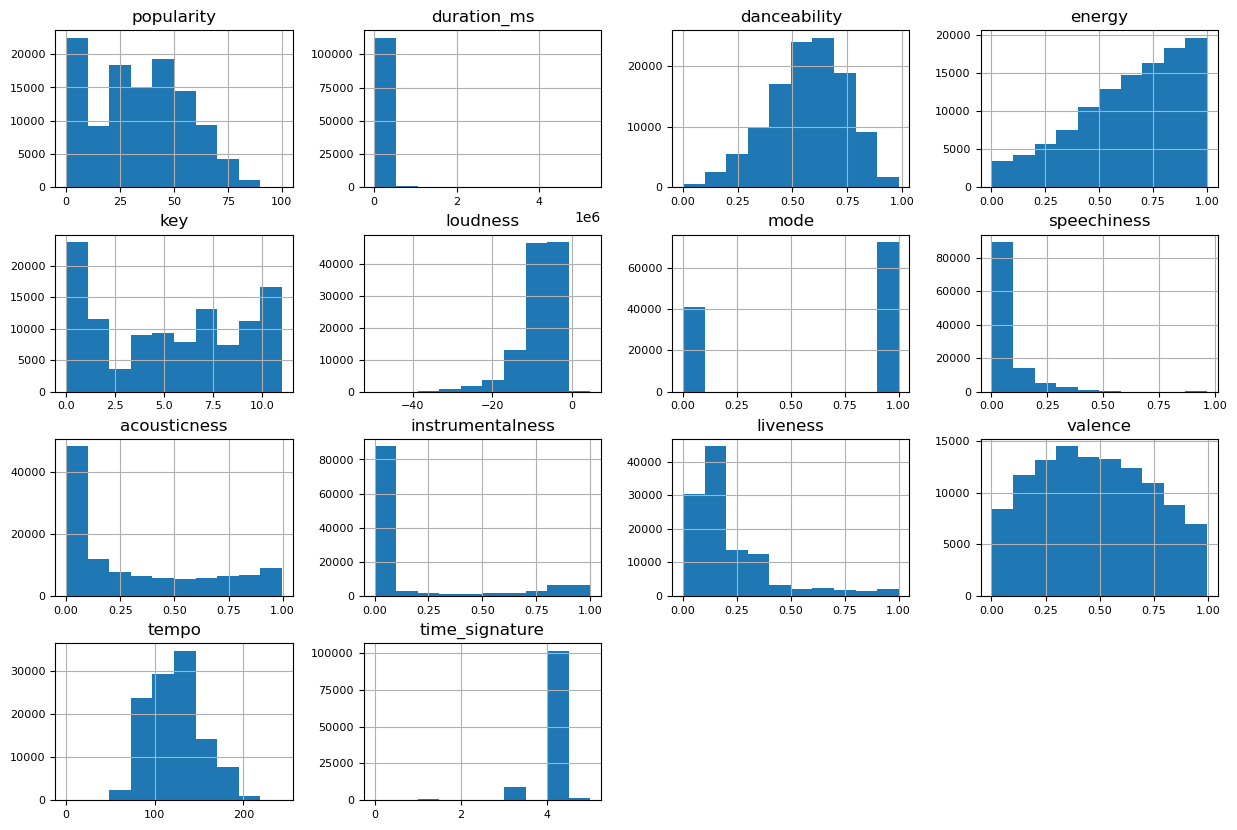

In [14]:
import matplotlib.pyplot as plt
num_cols.hist(figsize=(15,10), bins=10, xlabelsize=8, ylabelsize=8)
# Enable grid with specific settings
plt.grid(color='b', linestyle='-', linewidth=2)
plt.xticks(fontsize=14);


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=num_cols)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [16]:
spotify['duration_ms'].mean()

228081.37084430511

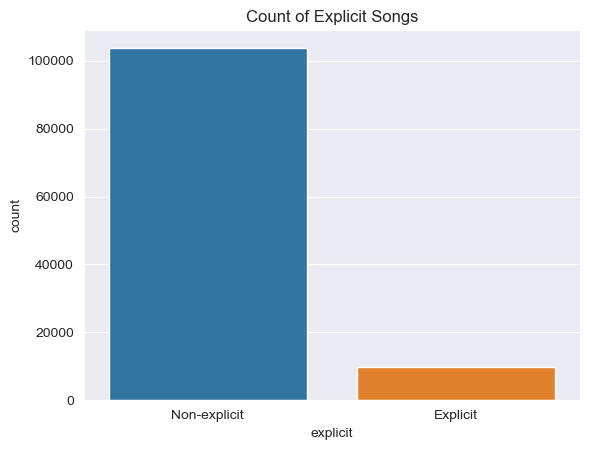

In [18]:
#plt.figure(figsize=(8, 6))

sns.countplot(data=spotify,  x='explicit')
plt.title('Count of Explicit Songs')
plt.xticks(ticks=[0, 1], labels=['Non-explicit', 'Explicit'])
       
#plt.subplot(1, 2, 2)
#sns.histplot(spotify, x='mode')
#plt.title('Count of Mode')

#plt.tight_layout()
plt.show()

In [ ]:
df = spotify.sort_values(by='popularity', ascending=False)

top_10_percent = df.head(int(0.001 * len(df_sorted)))

top_genres_count = top_10_percent.groupby('track_genre').size().reset_index(name='count')
top_genres_count = top_genres_count.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='track_genre', data=top_genres_count)
plt.title('Number of Songs in Top 0.001% by Genre')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

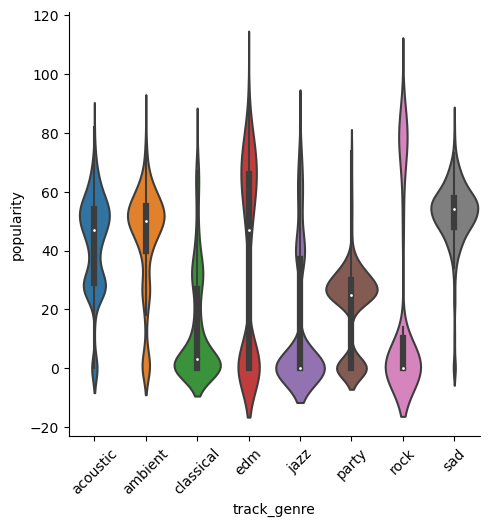

In [43]:
to_filter = ['acoustic', 'ambient', 'classical', 'edm', 'jazz', 'party', 'rock', 'sad']
filtered = spotify[spotify['track_genre'].isin(to_filter)]

sns.catplot(
    data=filtered, x="track_genre", y="popularity", 
    kind="violin", bw_adjust=1, split=False, 
    dodge=True, width=1
)

plt.xticks(rotation=45);


NameError: name 'ax' is not defined

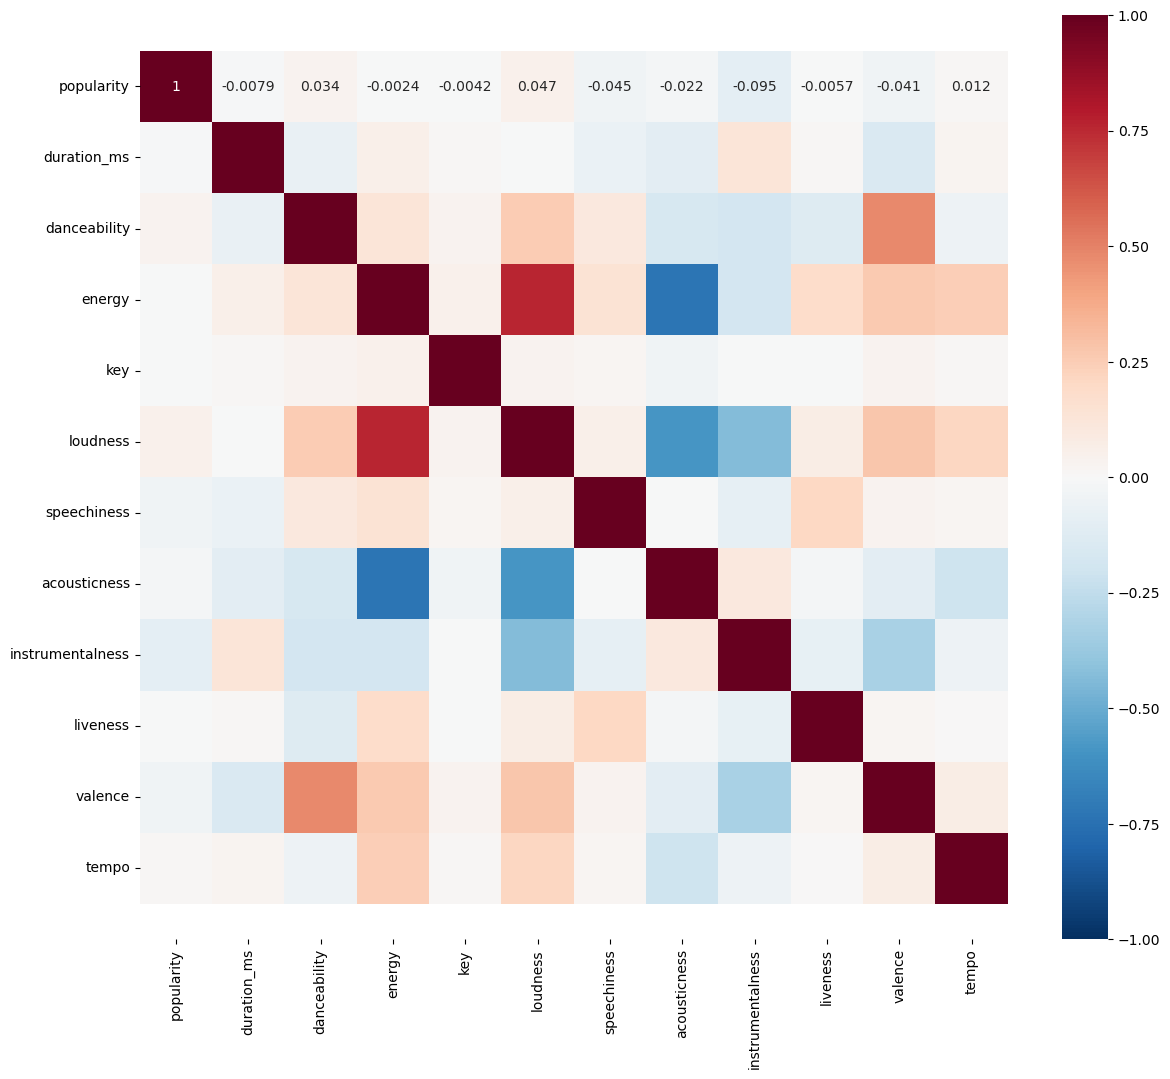

In [58]:

correlation = num_cols.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)


ax.set(yticks=[-0.5, 1.5], 
       xticks=[0, 1], 
       yticklabels=classes, 
       xticklabels=classes)
# ax.yaxis.set_major_locator(ticker.IndexLocater(base=1, offset=0.5))
# should change to 
ax.yaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0.5))